# Calculating Upper Limits for Non Detections

In [1]:
from __future__ import print_function, absolute_import, division, unicode_literals
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import astropy.units as u
from linetools.spectralline import AbsLine
from linetools.spectra import io as lsio
from linetools.isgm.abscomponent import AbsComponent
from linetools.spectra.xspectrum1d import XSpectrum1D
from linetools.lists.linelist import LineList

import glob
from astropy import constants as const


""" Utlities for the analysis of absorption lines
"""
import pdb
import warnings
from astropy.io import ascii
from astropy.utils import isiterable

## Import modules

from linetools.spectra import io as lsio
from linetools.spectra.xspectrum1d import XSpectrum1D
from linetools.spectralline import AbsLine, SpectralLine

import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import constants as const
import astropy.units as u

#plotting things 
%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 14

# update various fontsizes to match
params = {'figure.figsize': (8, 6),
          'legend.fontsize': 11,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.6 * fs,
          'ytick.labelsize': 0.6 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)

In [2]:
ism = LineList('ISM')
ism.all_transitions('CIV')

read_sets: Using set file -- 
  /Users/samgarza/linetools/linetools/lists/sets/llist_v1.3.ascii
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12


A,el,nj,nk,group,name,Ek,f,wrest,Ref,mol,Ej,Am,ion,Ex,Jj,Jk,Z,gk,gj,gamma,Id
1 / s,,,,,,1 / cm,,Angstrom,,,1 / cm,,,1 / cm,,,,,,1 / s,
float64,int64,int64,int64,int64,str12,float64,float64,float64,str14,str2,float64,int64,int64,float64,float64,float64,int64,int64,int64,float64,int64
264200000.0,0,0,0,1,CIV 1548,64590.99,1.8990e-01,1548.2040,Morton2003,--,0.0,0,4,0.0,0.0,0.0,6,4,2,264300000.0,342
262800000.0,0,0,0,1,CIV 1550,64483.65,9.4750e-02,1550.7810,Morton2003,--,0.0,0,4,0.0,0.0,0.0,6,2,2,262800000.0,343


In [18]:
#Bring in the data that needs upper limits calculated 

### CIV Non Detection 
all_vp_df_J1235 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/J1235_rereduc/J1235_rereducall_vp.csv')
all_vp_df_J1222 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/J1222_rereduc/J1222_rereducall_vp.csv')
all_vp_df_J1220 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/J1220_rereduc/J1220_rereducall_vp.csv')
all_vp_df_J1159 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/J1159_rereduc/J1159_rereducall_vp.csv')

In [19]:
## Define constants

c = const.c.to('km/s').value # Speed of light

# Function for reading in the spectrum

def get_spectrum(filename):
    flux_line = fits.getdata(filename, ext=0)
    flux_error = fits.getdata(filename, ext=1)
    wave_data = fits.getdata(filename, ext=2)
    flux_cont = fits.getdata(filename, ext=3)
    return wave_data, flux_line, flux_error, flux_cont

#CIV
line_wave_1548 = 1548.2040
line_wave_1550 = 1550.7810

# SiIV
#line_wave_1393 = 1393.7602

In [20]:
# Load spectrum
ism = LineList('ISM')

#################################################

#J1159
specfile_J1159 = '/Users/samgarza/Dropbox/COS-HolesHSTdata/J1159+5106/J1159+5106_nbin3_method1_jwnormaugust2023.fits' #normalized spectra file 
xspec_J1159 = lsio.readspec(specfile_J1159)

# Get wavelength, flux, flux error, and continuum flux for the spectrum
waves_J1159, flux_J1159, flux_err_J1159, cont_J1159 = get_spectrum(specfile_J1159)
# Calculate continuum-normalized flux
normflux_J1159, normflux_err_J1159 = flux_J1159/cont_J1159, flux_err_J1159/cont_J1159 

#################################################

#J1235
specfile_J1235 = '/Users/samgarza/Dropbox/COS-HolesHSTdata/J1235+1123/J1235+1123_nbin3_method1_jwnorm.fits' #normalized spectra file 
xspec_J1235 = lsio.readspec(specfile_J1235)

# Get wavelength, flux, flux error, and continuum flux for the spectrum
waves_J1235, flux_J1235, flux_err_J1235, cont_J1235 = get_spectrum(specfile_J1235)
# Calculate continuum-normalized flux
normflux_J1235, normflux_err_J1235 = flux_J1235/cont_J1235, flux_err_J1235/cont_J1235

#################################################

#J1222
specfile_J1222 = '/Users/samgarza/Dropbox/COS-HolesHSTdata/J1222+4612/J1222+4612_nbin3_method1_jwnorm.fits' #normalized spectra file 
xspec_J1222 = lsio.readspec(specfile_J1222)

# Get wavelength, flux, flux error, and continuum flux for the spectrum
waves_J1222, flux_J1222, flux_err_J1222, cont_J1222 = get_spectrum(specfile_J1222)
# Calculate continuum-normalized flux
normflux_J1222, normflux_err_J1222 = flux_J1222/cont_J1222, flux_err_J1222/cont_J1222

#################################################

#J1220
specfile_J1220 = '/Users/samgarza/Dropbox/COS-HolesHSTdata/J1220+4643/J1220+4643_nbin3_method1_jwnorm.fits' #normalized spectra file 
xspec_J1220 = lsio.readspec(specfile_J1220)

# Get wavelength, flux, flux error, and continuum flux for the spectrum
waves_J1220, flux_J1220, flux_err_J1220, cont_J1220 = get_spectrum(specfile_J1220)
# Calculate continuum-normalized flux
normflux_J1220, normflux_err_J1220 = flux_J1220/cont_J1220, flux_err_J1220/cont_J1220

#################################################

Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12


In [21]:
#Converts wavelengths to velocities 
def convert_wave2vel(obs_wave, rest_wave, LSR_vel=0.):
    # Define constants
    c = const.c.to('km/s').value #has the right value but no units 
    return (((obs_wave - rest_wave)/rest_wave) * c) - LSR_vel #calculates z then * c to makes velocity

#J1101, J1159, J1249, J1051, J1123, J0246, J1235, J1220 and J1222
LSR_values = np.array([676.9, 985.1, 307.8, 1469.8, 721, 1271.1, 1141.9, 461.08]) #10802.72,

#Will change line_wave between CIV and SiIV (only taking upper limits of the strong line)

### CIV 
vels_J1235_civ = convert_wave2vel(waves_J1235, line_wave_1550, LSR_vel=LSR_values[6]) #maybe some contamination in 1548? 
vels_J1222_civ = convert_wave2vel(waves_J1222, line_wave_1550, LSR_vel=LSR_values[7]) #becuase there is MW contamination in 1548
vels_J1220_civ = convert_wave2vel(waves_J1220, line_wave_1550, LSR_vel=LSR_values[7]) #becuase there is MW contamination in 1548
vels_J1159_civ = convert_wave2vel(waves_J1159, line_wave_1548, LSR_vel=LSR_values[1]) #contamination in 1550

## Sensitivity Limits Calculation

First, identify a featureless region of the spectrum near the line you are measuring. 

Then measure the column density of this noisy region (which theoretically should be 0), and the error on that column density measurement gives us the sensitivity limit.

In [22]:
# Choose the width of the velocity window you'll use to measure noise 
window_width = 100 # km/s

## Examine the spectrum by eye near the line of interest to find a featureless region where you want to measure noise

#################################################
###### CIV Non Detections ######
#################################################

##### J1235 #####

# Choose where this measurement window is centered. 
    # Change this variable to move the window around and identify a region with pure noise and no absorption features

centervel_J1235_civ = 0 

# Save min and max velocity limits of the window
leftlim_J1235_civ = centervel_J1235_civ-window_width/2
rightlim_J1235_civ = centervel_J1235_civ+window_width/2

def J1235_civ():
    # Plot spectrum
    plt.step(vels_J1235_civ, normflux_J1235)
    plt.ylim(0,1.3)
    plt.xlim(-400,500)
    # Plot velocity window
    plt.axvspan(leftlim_J1235_civ,rightlim_J1235_civ,alpha = 0.3,color='g')
    plt.xlabel('Relative Velocity [km/s]')
    plt.title('CIV J1235 Uplim Measurement Window')
    plt.show()
    
#################################################
    
##### J1222 #####
    
# Choose where this measurement window is centered. 
    # Change this variable to move the window around and identify a region with pure noise and no absorption features

centervel_J1222_civ = 0 

# Save min and max velocity limits of the window
leftlim_J1222_civ = centervel_J1222_civ-window_width/2
rightlim_J1222_civ = centervel_J1222_civ+window_width/2

def J1222_civ():
    # Plot spectrum
    plt.step(vels_J1222_civ, normflux_J1222)
    plt.ylim(0,1.3)
    plt.xlim(-400,500)
    # Plot velocity window
    plt.axvspan(leftlim_J1222_civ,rightlim_J1222_civ,alpha = 0.3,color='g')
    plt.xlabel('Relative Velocity [km/s]')
    plt.title('CIV J1222 Uplim Measurement Window')
    plt.show()
    
#################################################
    
##### J1220 #####
    
# Choose where this measurement window is centered. 
    # Change this variable to move the window around and identify a region with pure noise and no absorption features

centervel_J1220_civ = 0 

# Save min and max velocity limits of the window
leftlim_J1220_civ = centervel_J1220_civ-window_width/2
rightlim_J1220_civ = centervel_J1220_civ+window_width/2

def J1220_civ():
    # Plot spectrum
    plt.step(vels_J1220_civ, normflux_J1220)
    plt.ylim(0,1.3)
    plt.xlim(-400,500)
    # Plot velocity window
    plt.axvspan(leftlim_J1220_civ,rightlim_J1220_civ,alpha = 0.3,color='g')
    plt.xlabel('Relative Velocity [km/s]')
    plt.title('CIV J1220 Uplim Measurement Window')
    plt.show()

# Choose where this measurement window is centered. 
    # Change this variable to move the window around and identify a region with pure noise and no absorption features

centervel_J1159 = 0 

# Save min and max velocity limits of the window
leftlim_J1159 = centervel_J1159-window_width/2
rightlim_J1159 = centervel_J1159+window_width/2

def J1159():
    # Plot spectrum
    plt.step(vels_J1159_civ, normflux_J1159)
    plt.ylim(0,1.3)
    plt.xlim(-400,500)
    # Plot velocity window
    plt.axvspan(leftlim_J1159,rightlim_J1159,alpha = 0.3,color='g')
    plt.xlabel('Relative Velocity [km/s]')
    plt.title('CIV J1159 Uplim Measurement Window')
    plt.show()

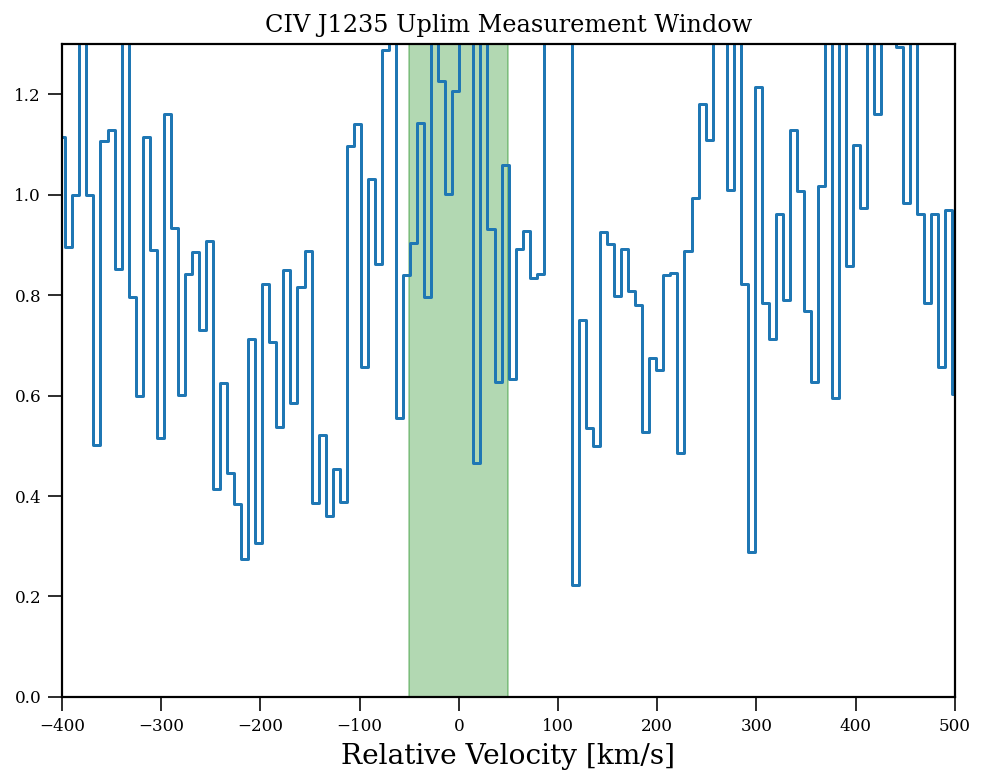

In [8]:
J1235_civ()

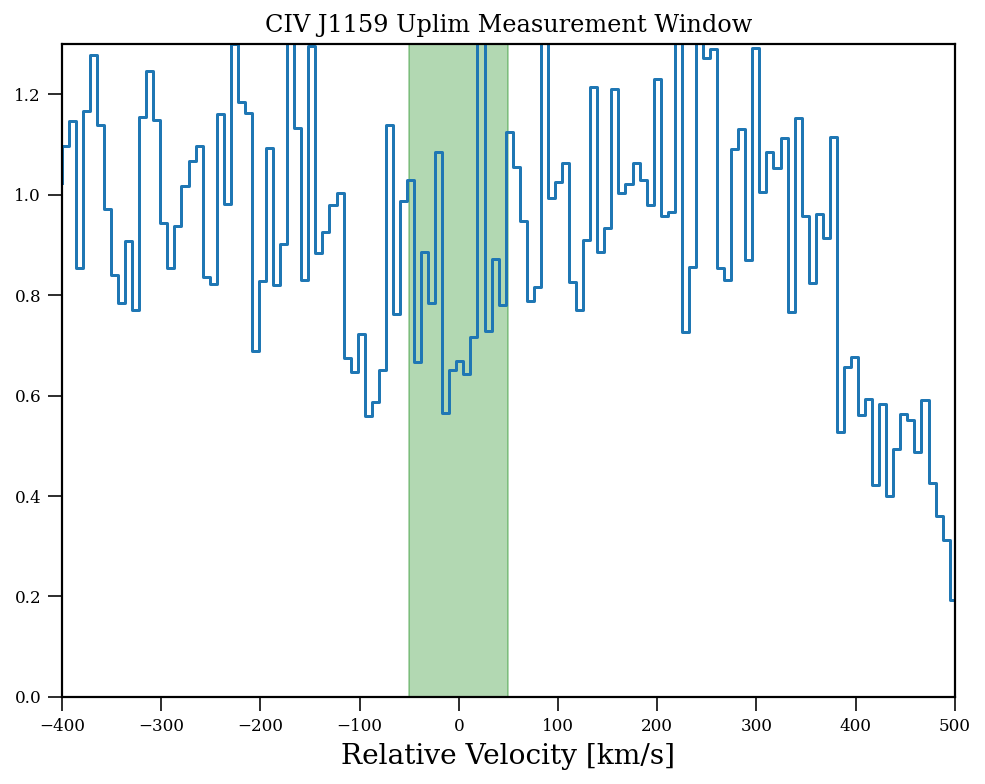

In [23]:
J1159()

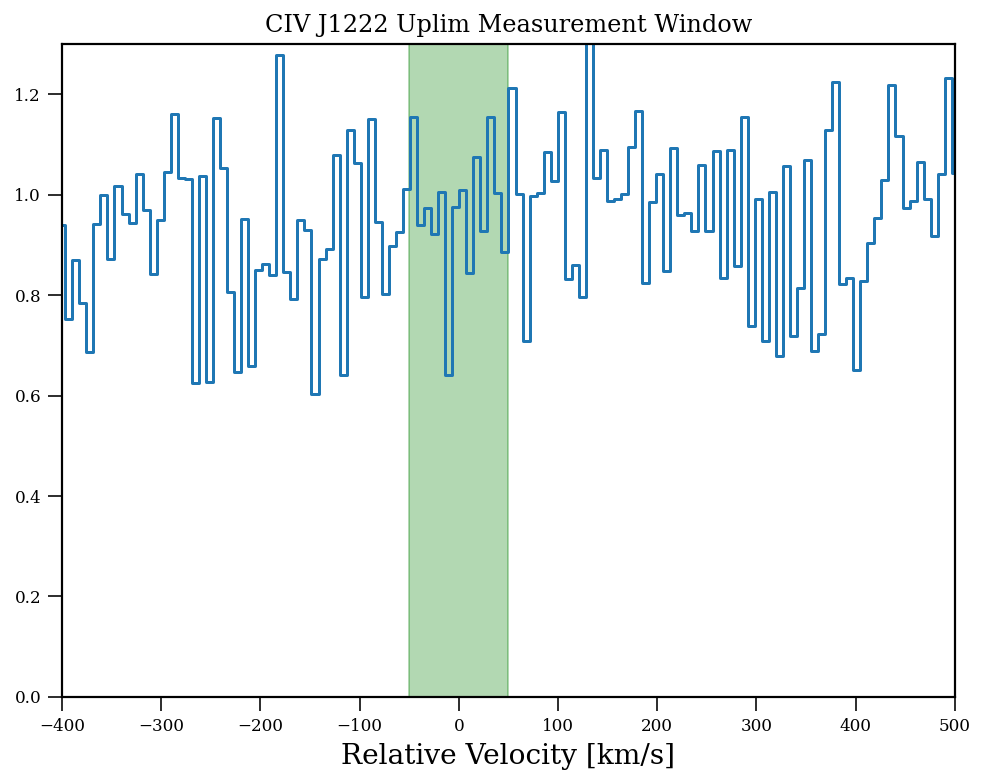

In [11]:
J1222_civ()

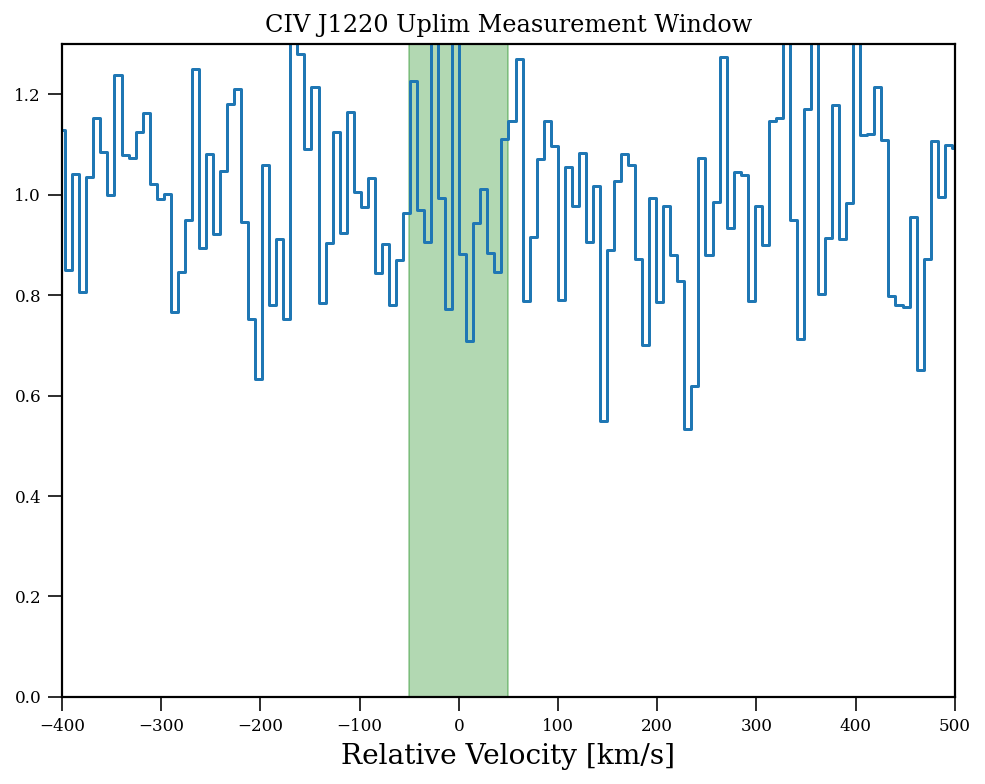

In [12]:
J1220_civ()

In [24]:
def sensitivity_limits(abslin, waves, normflux, normflux_err, leftlim, rightlim): 
    abs_line = abslin
    abs_line.analy['spec'] = XSpectrum1D.from_tuple((waves, normflux, normflux_err))  # Set spectrum
    abs_line.limits.set([leftlim,rightlim]*u.km/u.s) # Set analysis range
    abs_line.measure_aodm() # Measure column density (observer frame)
    
    N = abs_line.attrib['N']         # Column density measurement for featureless region (not used)
    N_err = abs_line.attrib['sig_N'] # Column density 1-sigma error for featureless region
    
    return N_err

# Set absorption line
abslin_civ = AbsLine('CIV 1548')
abslin_civ_1550 = AbsLine('CIV 1550')

Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12


In [30]:
#Getting the upper limits for each of the non detections 

N_err_civ_J1235=sensitivity_limits(abslin_civ_1550, waves_J1235, normflux_J1235, normflux_err_J1235, leftlim_J1235_civ, rightlim_J1235_civ)

N_err_civ_J1159 = sensitivity_limits(abslin_civ, waves_J1159, normflux_J1159, normflux_err_J1159, leftlim_J1159, rightlim_J1159)

N_err_civ_J1222=sensitivity_limits(abslin_civ_1550, waves_J1222, normflux_J1222,normflux_err_J1222,leftlim_J1222_civ,rightlim_J1222_civ)

N_err_civ_J1220=sensitivity_limits(abslin_civ_1550, waves_J1220, normflux_J1220,normflux_err_J1220,leftlim_J1220_civ,rightlim_J1220_civ)

/Users/samgarza/linetools/linetools/spectra/xspectrum1d.py:107: UserWarning: Assuming wavelength unit is Angstroms
  warnings.warn("Assuming wavelength unit is Angstroms")


The error on the column density for a region with no absorption gives the sensitivity limit, since any gas absorption at this column density or lower will be indistinguishable from noise

Note: error given is a 1-sigma error. If you want to report 2-sigma error you can simply multiply the column density error by 2

In [31]:
#Just the CIV bc that is what I care about right now 

sigma = 2.

N_uplim_civ_J1235 = np.round(np.log10(np.abs(sigma * N_err_civ_J1235.value)),2)
print("CIV J1235 (2-sigma sensitivity limit): logN <", N_uplim_civ_J1235) # In cm^-2

N_uplim_civ_J1222 = np.round(np.log10(np.abs(sigma * N_err_civ_J1222.value)),2)
print("CIV J1222 (2-sigma sensitivity limit): logN <", N_uplim_civ_J1222) # In cm^-2

N_uplim_civ_J1220 = np.round(np.log10(np.abs(sigma * N_err_civ_J1220.value)),2)
print("CIV J1220 (2-sigma sensitivity limit): logN <", N_uplim_civ_J1220) # In cm^-2

N_uplim_civ_J1159 = np.round(np.log10(np.abs(sigma * N_err_civ_J1159.value)),2)
print("CIV J1159 (2-sigma sensitivity limit): logN <", N_uplim_civ_J1159) # In cm^-2

CIV J1235 (2-sigma sensitivity limit): logN < 13.74
CIV J1222 (2-sigma sensitivity limit): logN < 13.41
CIV J1220 (2-sigma sensitivity limit): logN < 13.45
CIV J1159 (2-sigma sensitivity limit): logN < 13.6
